In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [87]:
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('../data/raw/plays2024.csv')

df2 = pd.read_csv('../data/raw/plays2025.csv')

plays = pd.concat([df1, df2], ignore_index=True)

# Exploratory Data Analysis (EDA)

## Data Overview

In [88]:
plays.head()

,gameId,playId,ballCarrierId,ballCarrierDisplayName,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,passLength,penaltyYards,prePenaltyPlayResult,playResult,playNullifiedByPenalty,absoluteYardlineNumber,offenseFormation,defendersInTheBox,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2,receiverAlignment,playClockAtSnap,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,prePenaltyYardsGained,yardsGained,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone
0,2022100908,3537,48723.0,Parker Hesse,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,6.0,NaN,9.0,9.0,N,69,SHOTGUN,7.0,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022091103,3126,52457.0,Chase Claypool,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,NaN,NaN,3.0,3.0,N,76,SHOTGUN,7.0,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022091111,1148,42547.0,Darren Waller,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,11.0,NaN,15.0,15.0,N,40,I_FORM,6.0,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022100212,2007,46461.0,Mike Boone,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,NaN,NaN,7.0,7.0,N,47,SINGLEBACK,6.0,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022091900,1372,47857.0,Devin Singletary,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,NaN,NaN,3.0,3.0,N,75,I_FORM,7.0,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns_to_remove = [
    'foulName1', 'foulName2', 'foulNFLId1', 'foulNFLId2', 'receiverAlignment',
    'playClockAtSnap', 'targetX', 'targetY', 'playAction', 'dropbackType',
    'dropbackDistance', 'passLocationType', 'timeToThrow', 'timeInTackleBox',
    'timeToSack', 'passTippedAtLine', 'unblockedPressure', 'qbSpike', 'qbKneel',
    'qbSneak', 'rushLocationType', 'prePenaltyYardsGained', 'yardsGained',
    'isDropback', 'pff_runConceptPrimary', 'pff_runConceptSecondary',
    'pff_runPassOption', 'pff_passCoverage', 'pff_manZone','penaltyYards','ballCarrierId','ballCarrierDisplayName',
    'playResult', 'prePenaltyPlayResult', 'defendersInTheBox','passLength','playNullifiedByPenalty'
]

plays = plays.drop(columns=columns_to_remove)

plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,gameClock,preSnapHomeScore,preSnapVisitorScore,passResult,absoluteYardlineNumber,offenseFormation,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded
0,2022100908,3537,(7:52) (Shotgun) M.Mariota pass short middle t...,4,1,10,ATL,TB,ATL,41,7:52,21,7,C,69,SHOTGUN,0.747284,0.976785,0.023215,-0.006110,0.006110,2.360609,0.981955
1,2022091103,3126,(7:38) (Shotgun) C.Claypool right end to PIT 3...,4,1,10,PIT,CIN,PIT,34,7:38,14,20,NaN,76,SHOTGUN,0.416454,0.160485,0.839515,-0.010865,0.010865,1.733344,-0.263424
2,2022091111,1148,(8:57) D.Carr pass short middle to D.Waller to...,2,2,5,LV,LAC,LV,30,8:57,10,3,C,40,I_FORM,0.267933,0.756661,0.243339,-0.037409,0.037409,1.312855,1.133666
3,2022100212,2007,(13:12) M.Boone left tackle to DEN 44 for 7 ya...,3,2,10,DEN,LV,DEN,37,13:12,19,16,NaN,47,SINGLEBACK,0.592704,0.620552,0.379448,-0.002451,0.002451,1.641006,-0.043580
4,2022091900,1372,(8:33) D.Singletary right guard to TEN 32 for ...,2,1,10,BUF,TEN,TEN,35,8:33,7,7,NaN,75,I_FORM,0.470508,0.836290,0.163710,0.001053,-0.001053,3.686428,-0.167903


In [90]:
plays.shape

(28610, 23)

In [91]:
numerical_features = plays.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = plays.select_dtypes(include=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['gameId', 'playId', 'quarter', 'down', 'yardsToGo', 'yardlineNumber', 'preSnapHomeScore', 'preSnapVisitorScore', 'absoluteYardlineNumber', 'passProbability', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded', 'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded']
Categorical features: ['playDescription', 'possessionTeam', 'defensiveTeam', 'yardlineSide', 'gameClock', 'passResult', 'offenseFormation']


In [92]:
duplicates = plays.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [93]:
plays['yardsToGo'].value_counts()

yardsToGo
10    14215
1      1685
5      1529
7      1323
6      1271
8      1233
4      1176
2      1155
3      1077
9      1067
15      520
11      498
12      355
20      288
13      242
14      239
16      160
18      125
17      112
19      108
21       50
22       48
25       41
23       27
26       17
24       16
27       14
30        7
28        6
36        2
38        2
29        2
Name: count, dtype: int64

In [94]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28610 entries, 0 to 28609
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            28610 non-null  int64  
 1   playId                            28610 non-null  int64  
 2   playDescription                   28610 non-null  object 
 3   quarter                           28610 non-null  int64  
 4   down                              28610 non-null  int64  
 5   yardsToGo                         28610 non-null  int64  
 6   possessionTeam                    28610 non-null  object 
 7   defensiveTeam                     28610 non-null  object 
 8   yardlineSide                      28219 non-null  object 
 9   yardlineNumber                    28610 non-null  int64  
 10  gameClock                         28610 non-null  object 
 11  preSnapHomeScore                  28610 non-null  int64  
 12  preS

In [95]:
plays.describe()

,gameId,playId,quarter,down,yardsToGo,yardlineNumber,preSnapHomeScore,preSnapVisitorScore,absoluteYardlineNumber,passProbability,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded
count,2.861000e+04,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,12149.000000,28610.000000,28610.000000,28610.000000,28610.000000,28610.000000,28609.000000
mean,2.022099e+09,2007.583887,2.562600,1.768612,8.464698,29.377595,11.218665,9.968158,60.418979,0.603845,0.553853,0.446147,0.000011,-0.000011,2.249961,0.113212
std,5.967803e+03,1178.976443,1.136009,0.813485,3.916929,12.570038,9.456886,9.189128,24.148059,0.237096,0.289364,0.289364,0.039532,0.039532,1.636163,1.322718
min,2.022091e+09,54.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,11.000000,0.005607,0.001049,0.000803,-0.834887,-0.541161,-2.366872,-13.023600
25%,2.022093e+09,977.000000,2.000000,1.000000,6.000000,21.000000,3.000000,0.000000,40.000000,0.447226,0.327495,0.208220,-0.012210,-0.012496,1.033911,-0.550216
50%,2.022101e+09,2005.000000,3.000000,2.000000,10.000000,30.000000,10.000000,7.000000,61.000000,0.584451,0.582652,0.417348,0.000002,-0.000002,2.018800,-0.040995
75%,2.022102e+09,3008.000000,4.000000,2.000000,10.000000,40.000000,17.000000,16.000000,81.000000,0.792913,0.791780,0.672505,0.012496,0.012210,3.466198,0.788754
max,2.022111e+09,5120.000000,5.000000,4.000000,38.000000,50.000000,49.000000,48.000000,109.000000,0.996206,0.999197,0.998951,0.541161,0.834887,6.558894,8.698986


In [96]:
plays['passResult'].value_counts()

passResult
C     11258
I      2911
R       871
S       608
IN      193
Name: count, dtype: int64

### Checking missing values

gameId                                  0
playId                                  0
playDescription                         0
quarter                                 0
down                                    0
yardsToGo                               0
possessionTeam                          0
defensiveTeam                           0
yardlineSide                          391
yardlineNumber                          0
gameClock                               0
preSnapHomeScore                        0
preSnapVisitorScore                     0
passResult                          12769
absoluteYardlineNumber                  0
offenseFormation                      192
passProbability                     16461
preSnapHomeTeamWinProbability           0
preSnapVisitorTeamWinProbability        0
homeTeamWinProbabilityAdded             0
visitorTeamWinProbilityAdded            0
expectedPoints                          0
expectedPointsAdded                     1
dtype: int64


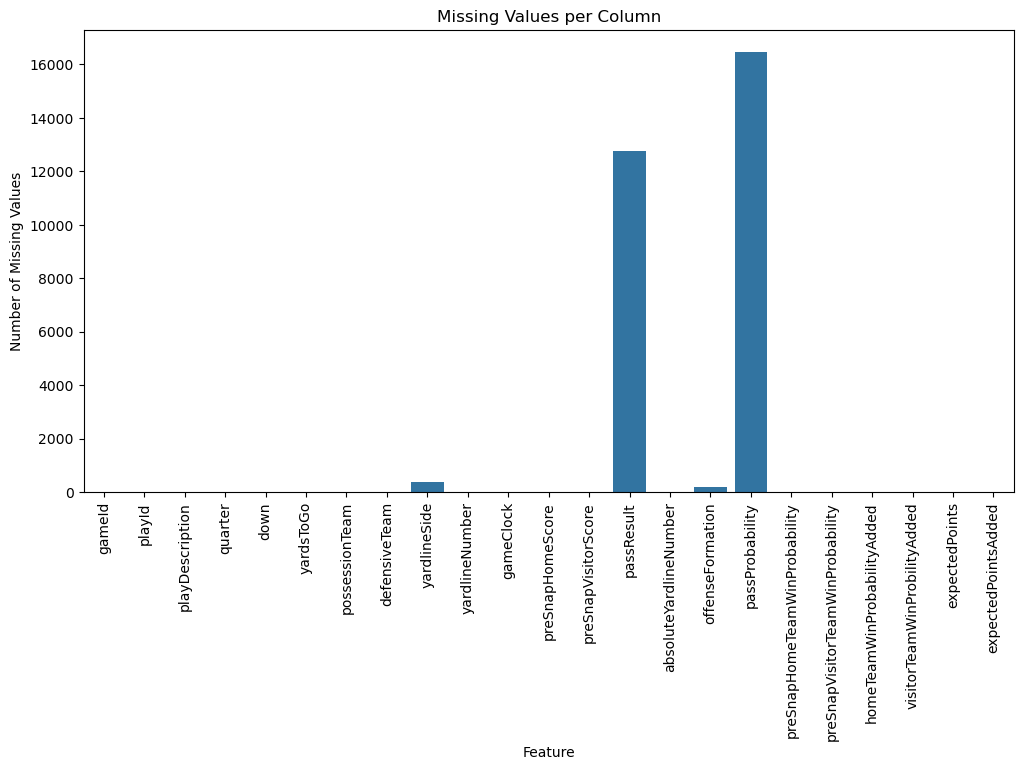

In [ ]:
missing_values = plays.isnull().sum()
print(missing_values)

plt.figure(figsize=(12, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title("Missing Values per Column")
plt.ylabel("Number of Missing Values")
plt.xlabel("Feature")
plt.show()


`passResult` and `passProbability` will be dropped, while yardlineSide will be imputed using mean

### Analyze Target Variable (playType)

In [79]:
plays['playType'] = np.where(plays['passResult'].notna(), 'Pass', 'Rush')

# Check the distribution of playType
print(plays['playType'].value_counts())

playType
Pass    15841
Rush    12769
Name: count, dtype: int64


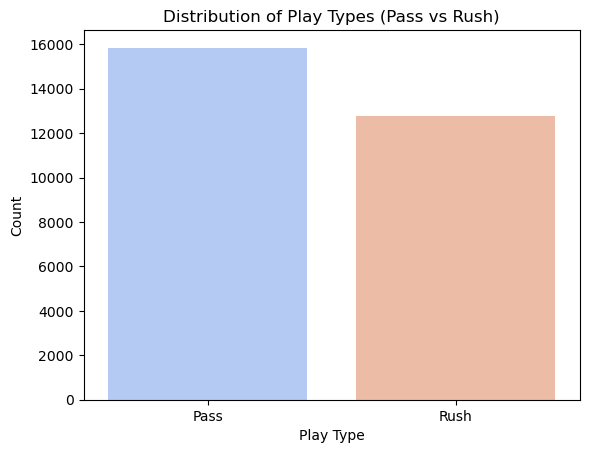

In [80]:
sns.countplot(data=plays, x='playType', hue='playType', dodge=False, palette='coolwarm')
plt.title('Distribution of Play Types (Pass vs Rush)')
plt.xlabel('Play Type')
plt.ylabel('Count')
plt.show()

## Continuous Features Analysis

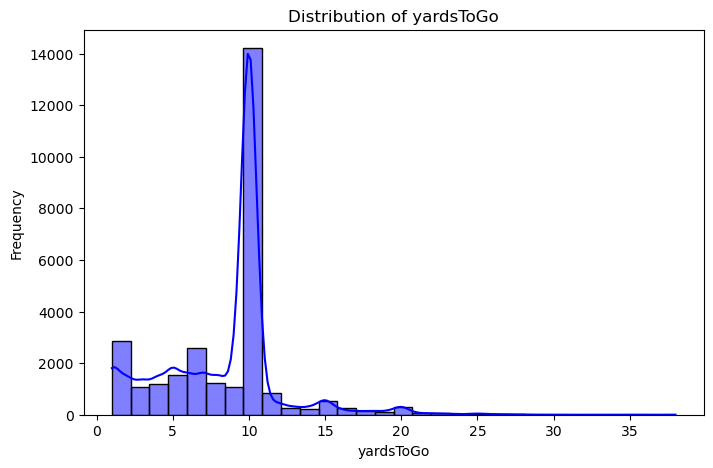

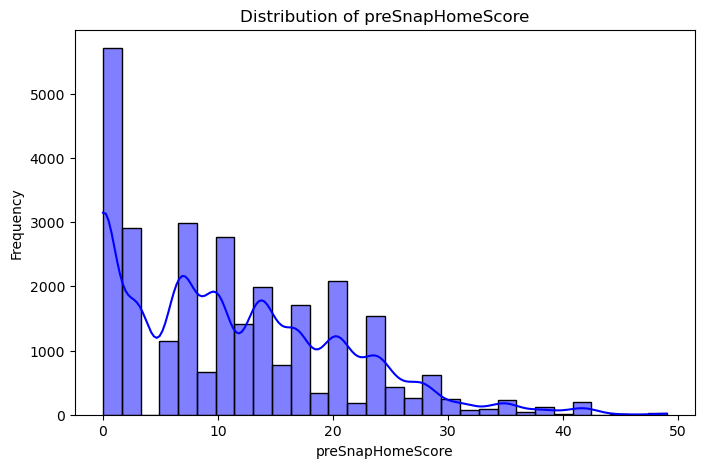

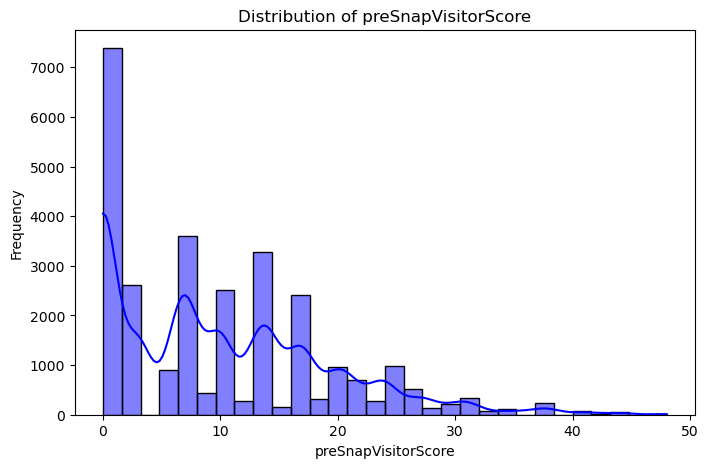

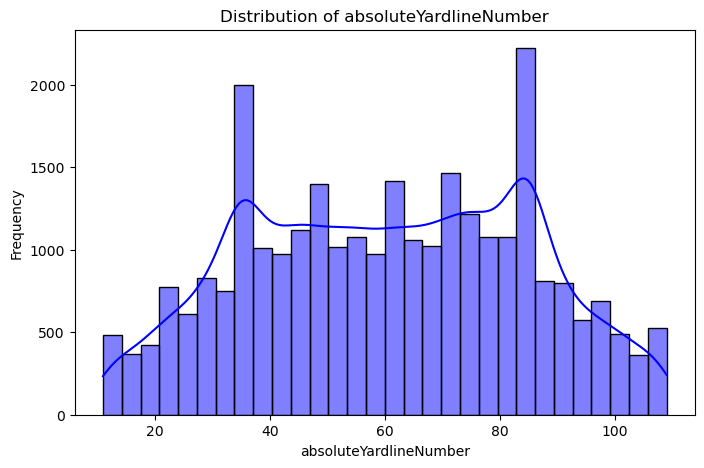

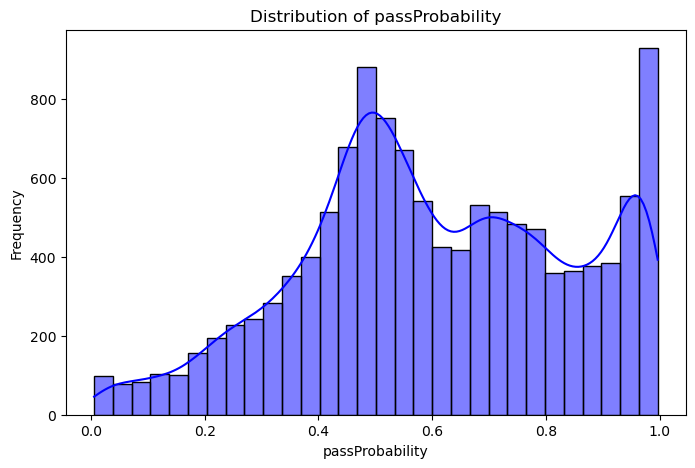

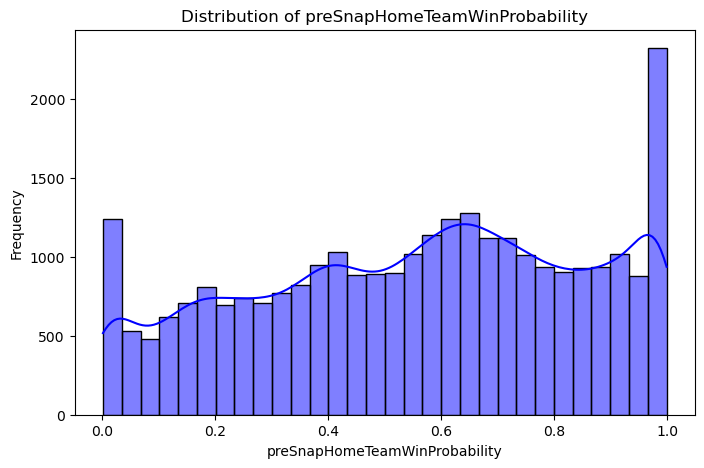

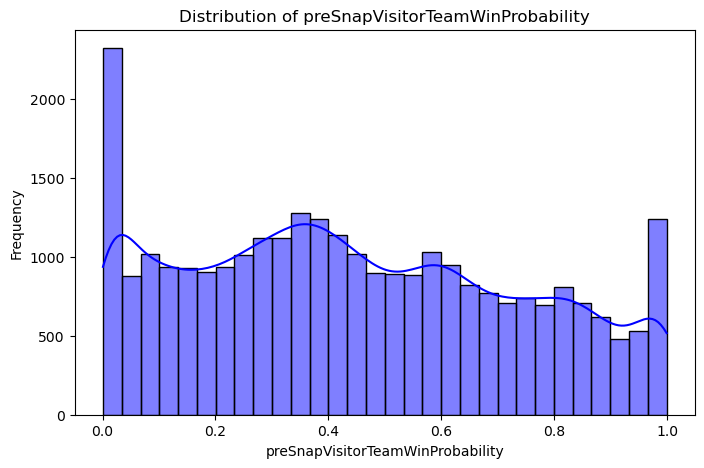

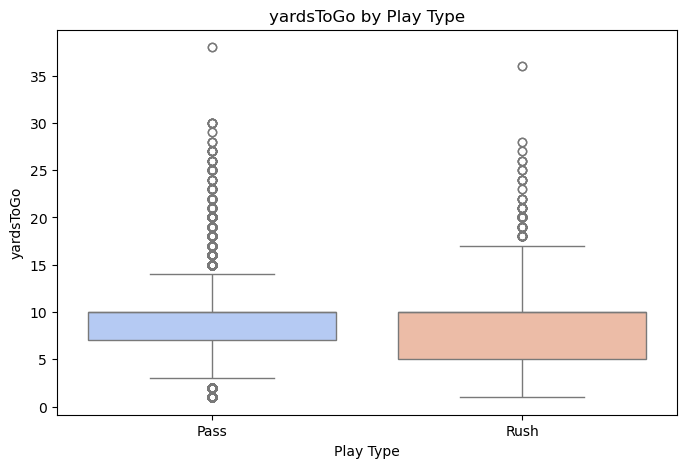

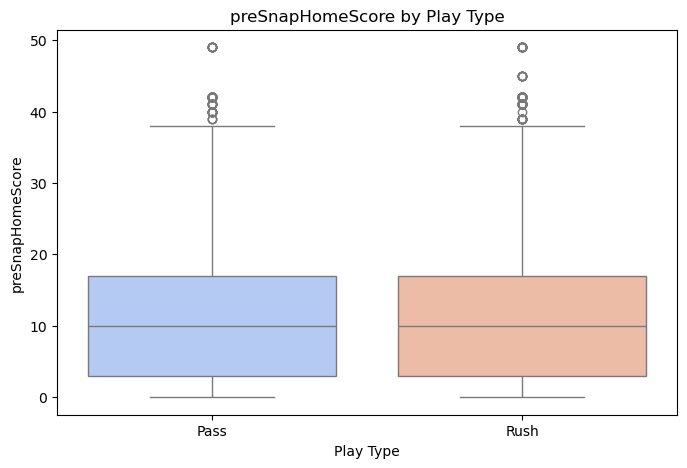

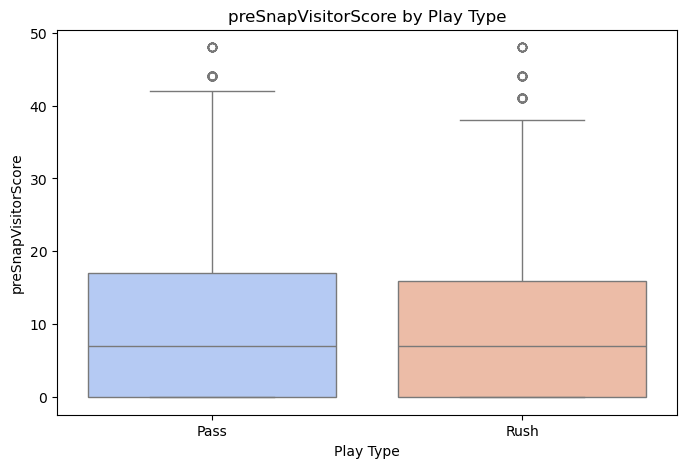

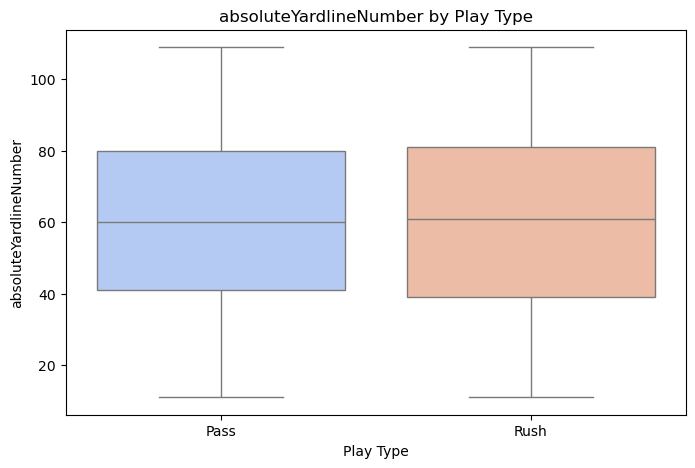

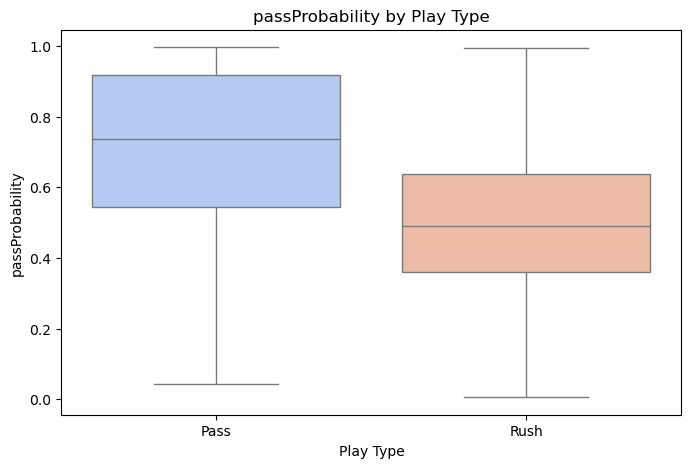

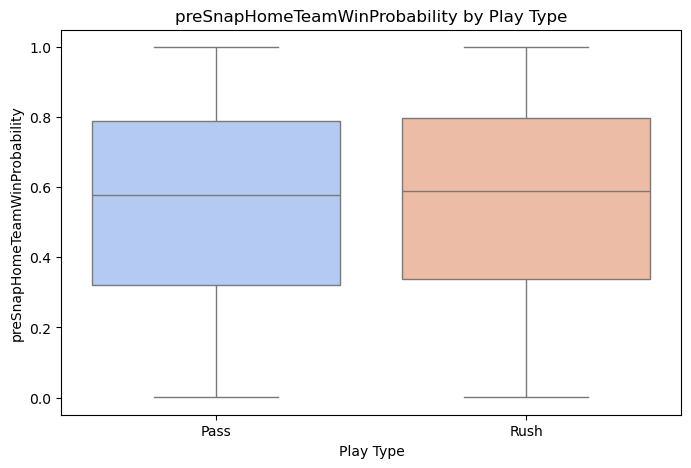

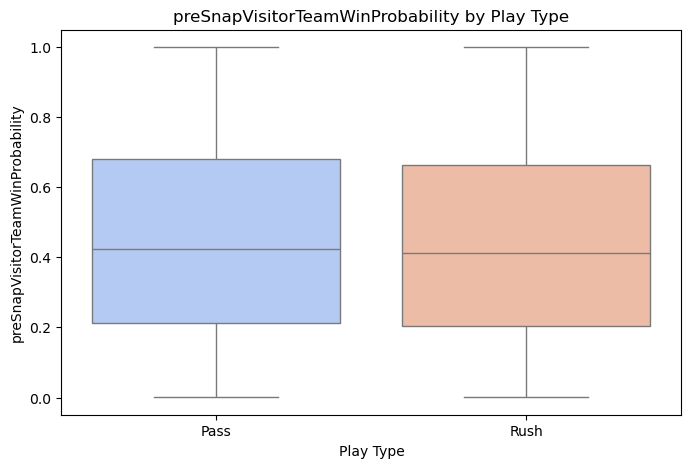

In [ ]:
continuous_features = [
    'yardsToGo', 'preSnapHomeScore', 
    'preSnapVisitorScore', 'absoluteYardlineNumber',
    'passProbability', 'preSnapHomeTeamWinProbability', 'preSnapVisitorTeamWinProbability'
]

# Histograms with KDE for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(plays[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots to analyze relationship with playType
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=plays, x='playType', y=feature, legend=False, palette='coolwarm', hue='playType')
    plt.title(f'{feature} by Play Type')
    plt.xlabel('Play Type')
    plt.ylabel(feature)
    plt.show()


## Categorical Features Analysis

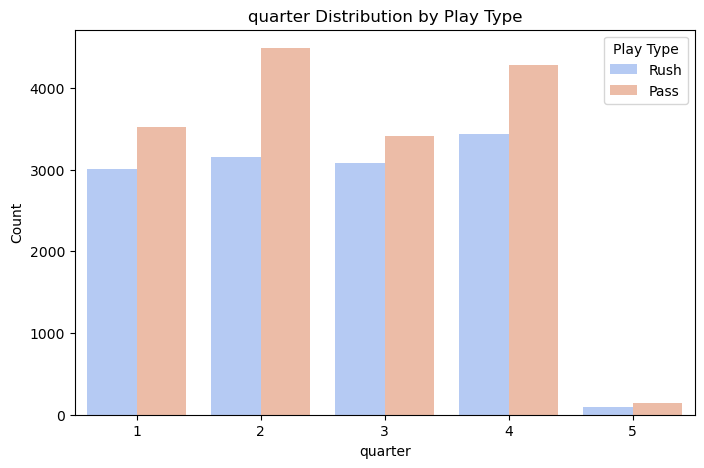

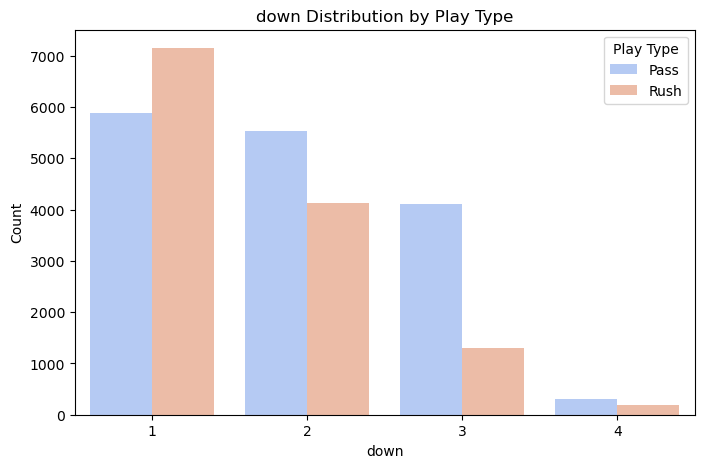

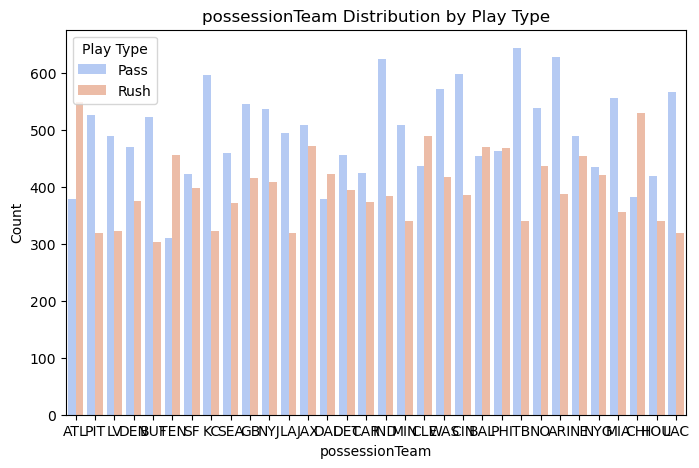

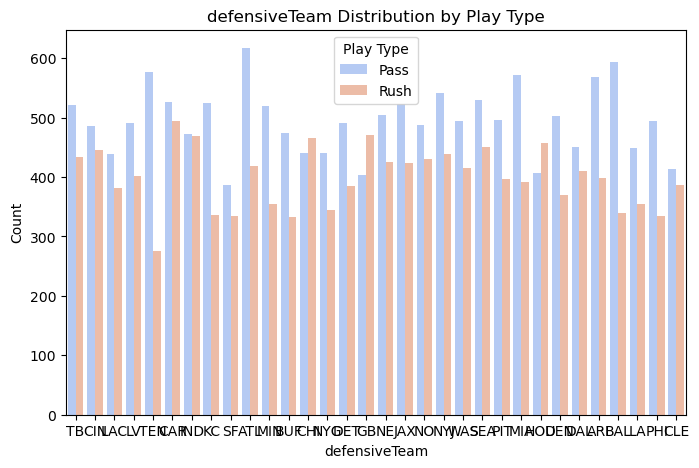

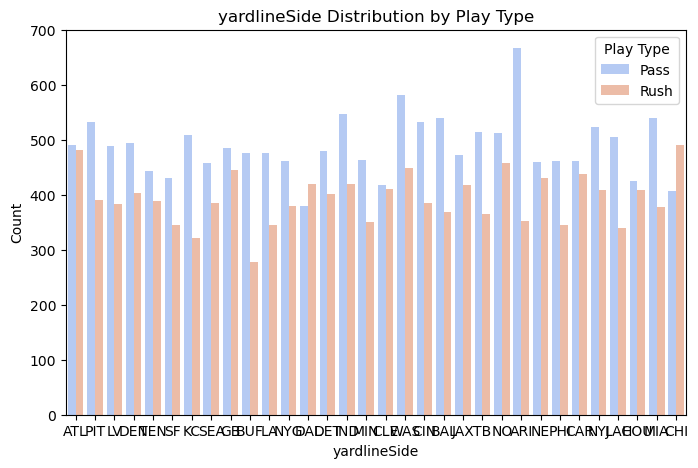

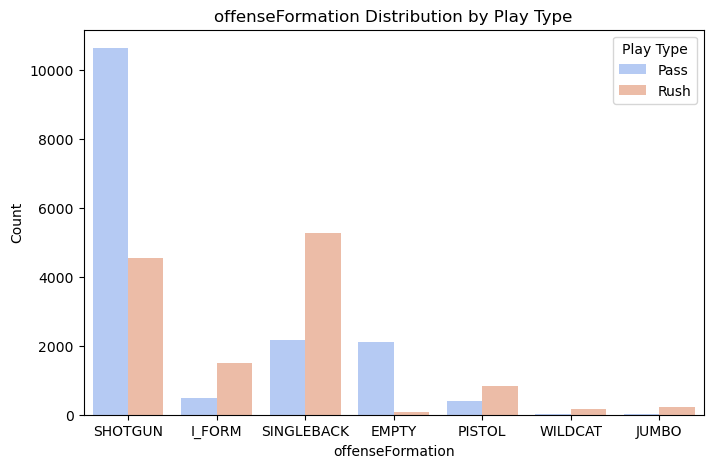

In [ ]:
categorical_features = [
    'quarter', 'down', 'possessionTeam', 'defensiveTeam', 
    'yardlineSide', 'offenseFormation'
]

for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=plays, x=feature, hue='playType', palette='coolwarm')
    plt.title(f'{feature} Distribution by Play Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Play Type')
    plt.show()


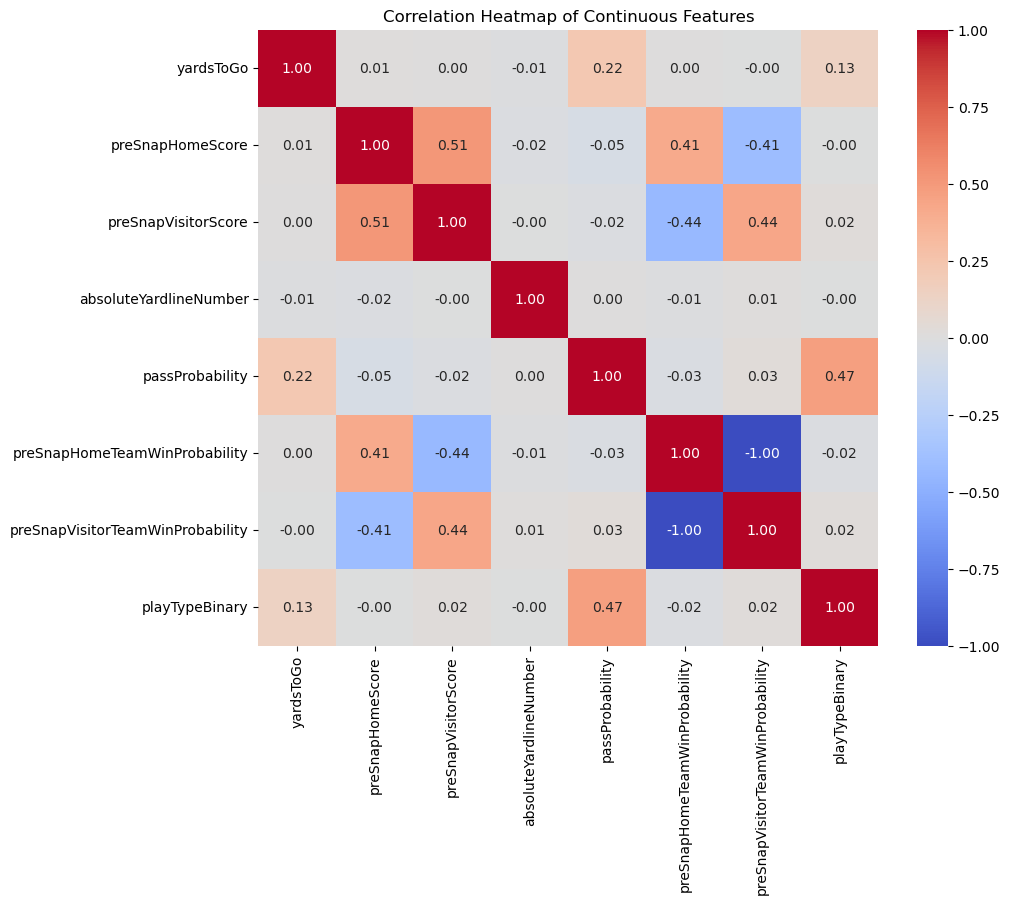

In [ ]:
plays['playTypeBinary'] = plays['playType'].apply(lambda x: 1 if x == 'Pass' else 0)

correlation_matrix = plays[continuous_features + ['playTypeBinary']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

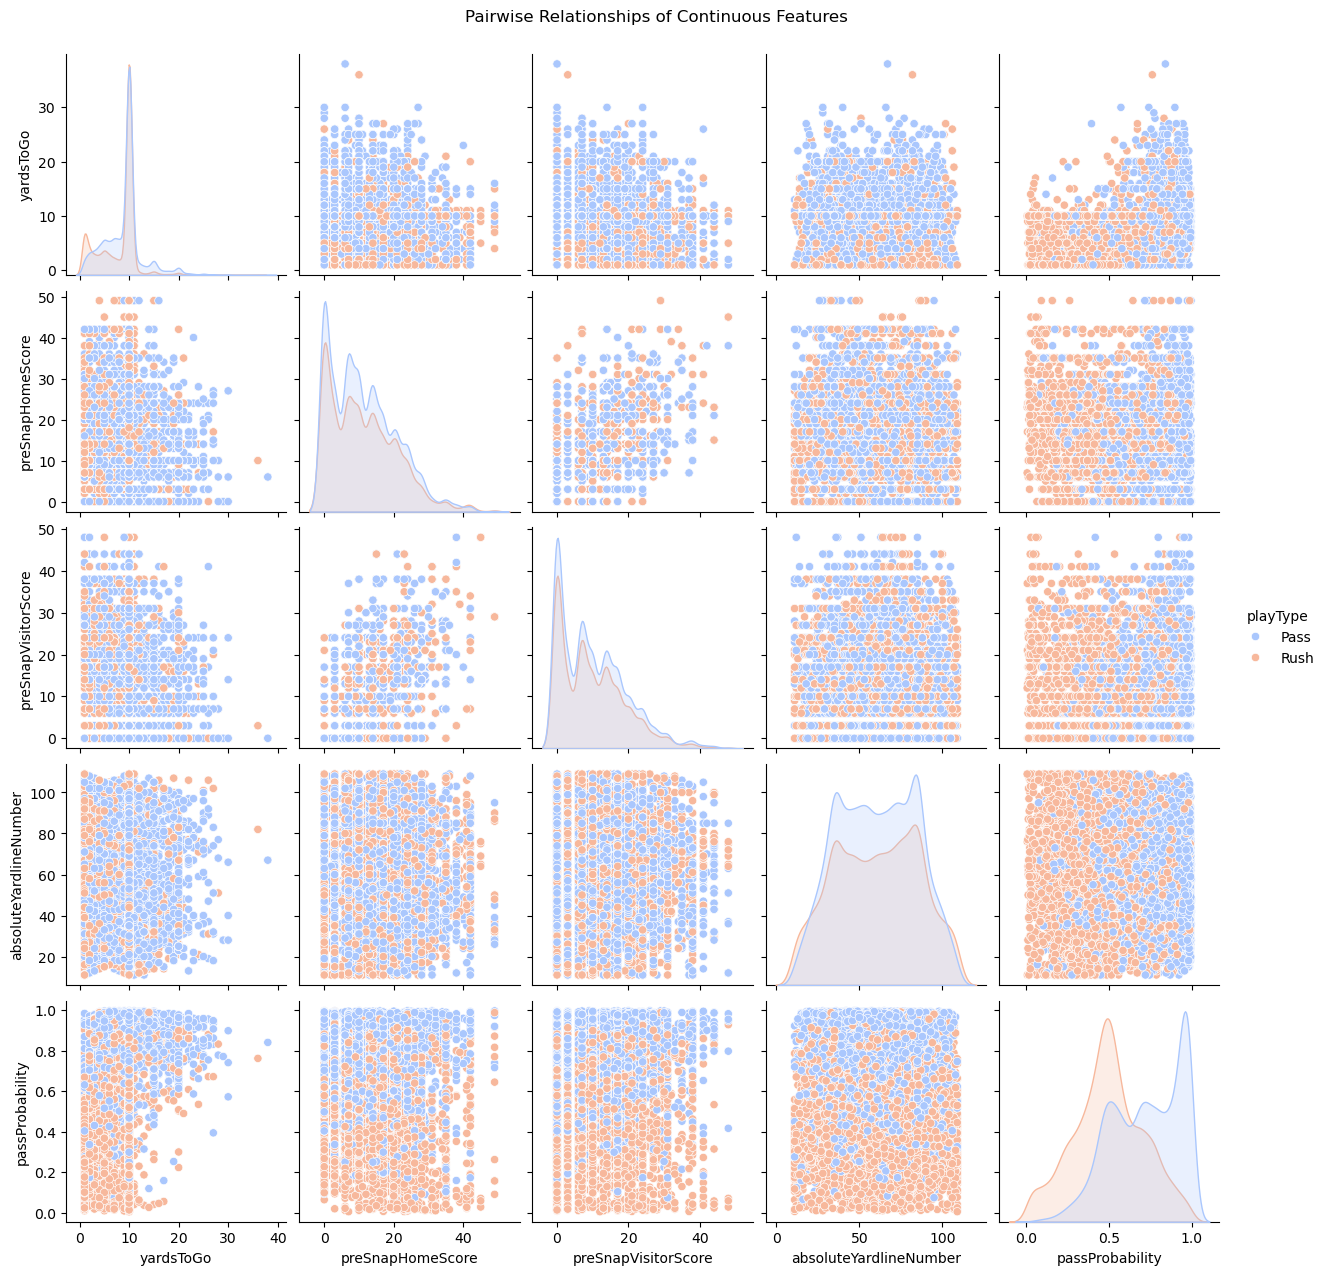

In [ ]:
sns.pairplot(plays, vars=continuous_features[:5], hue='playType', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Continuous Features', y=1.02)
plt.show()